In [24]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [25]:
# Initial Scrape

url = 'https://nba2kw.com/list/nba-2k-ratings-top-100-players/'
req = requests.get(url)

data = req.text
soup = BeautifulSoup(req.content, 'lxml')

In [26]:
# Inspect Table

table = soup.find_all('table')[0]
rank = pd.read_html(str(table))
display(rank)

[    Rank                 Player      Team Pos.  OVR Height  \
 0      1           LeBron James    Lakers   SF   98   6'9"   
 1      2  Giannis Antetokounmpo     Bucks   PF   97  6'11"   
 2      3           James Harden   Rockets   SG   96   6'5"   
 3      4          Kawhi Leonard  Clippers   SF   96   6'7"   
 4      5          Anthony Davis    Lakers   PF   96  6'10"   
 ..   ...                    ...       ...  ...  ...    ...   
 95    96             Al Horford     76ers    C   80   6'9"   
 96    97           Marcus Smart   Celtics   SG   80   6'3"   
 97    98        Dejounte Murray     Spurs   PG   80   6'4"   
 98    99          Evan Fournier     Magic   SG   80   6'7"   
 99   100          Rui Hachimura   Wizards   PF   79   6'8"   
 
                        Build  
 0   2-Way Slashing Playmaker  
 1   2-Way Slashing Playmaker  
 2           Offensive Threat  
 3      2-Way Scoring Machine  
 4             Interior Force  
 ..                       ...  
 95  2-Way Mid-Ran

In [27]:
# Convert to DataFrame

df = pd.read_html(str(table))[0]
df.set_index('Rank', inplace=True)
display(df)

,Player,Team,Pos.,OVR,Height,Build
Rank,,,,,,
1,LeBron James,Lakers,SF,98,"6'9""",2-Way Slashing Playmaker
2,Giannis Antetokounmpo,Bucks,PF,97,"6'11""",2-Way Slashing Playmaker
3,James Harden,Rockets,SG,96,"6'5""",Offensive Threat
4,Kawhi Leonard,Clippers,SF,96,"6'7""",2-Way Scoring Machine
5,Anthony Davis,Lakers,PF,96,"6'10""",Interior Force
...,...,...,...,...,...,...
96,Al Horford,76ers,C,80,"6'9""",2-Way Mid-Range Finisher
97,Marcus Smart,Celtics,SG,80,"6'3""",Perimeter Lockdown
98,Dejounte Murray,Spurs,PG,80,"6'4""",2-Way Scoring Machine


In [28]:
# Teams with the most players in the NBA 2k21 Top 100

df['Team'].value_counts().head()

Nets        6
Celtics     5
76ers       5
Clippers    5
Jazz        4
Name: Team, dtype: int64

In [29]:
# Most common player Build

df['Build'].value_counts().idxmax()

'Offensive Threat'

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

(85.0, 100.0)

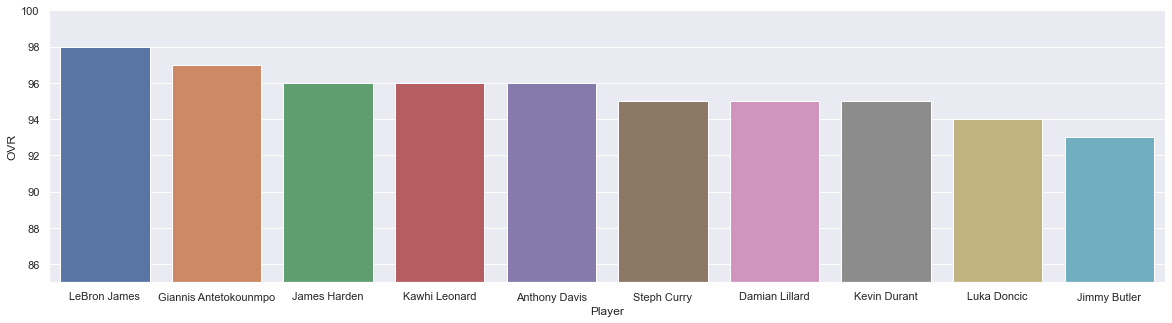

In [31]:
# Plotting the Top 10 rated players

df2 = df.head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=df2, x='Player', y='OVR')
plt.ylim(85,100)